In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import warnings
warnings.simplefilter(action='ignore') 

In [2]:
df=pd.read_csv("/Data/AB_NYC_2019.csv",usecols=[0,1,2,3,4,5,6,7],index_col="host_id",)     
df.columns

Index(['host_name', 'host Gender', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews'],
      dtype='object')

In [3]:
df=df.dropna(axis=0,how="all")  

In [4]:
df.isnull().sum() 

host_name             10
host Gender          146
neighbourhood          0
room_type              0
price                  2
minimum_nights        24
number_of_reviews     13
dtype: int64

In [5]:
df= df.dropna(subset=["host_name","host Gender"]) 

In [6]:
df.isnull().sum() 

host_name             0
host Gender           0
neighbourhood         0
room_type             0
price                 2
minimum_nights       23
number_of_reviews    12
dtype: int64

In [7]:
df

,host_name,host Gender,neighbourhood,room_type,price,minimum_nights,number_of_reviews
host_id,,,,,,,
2787.0,John,M,Kensington,Private room,149.0,1.0,9.0
2845.0,Jennifer,F,Midtown,Entire home/apt,225.0,1.0,45.0
4632.0,Elisabeth,F,Harlem,Private room,150.0,3.0,0.0
4869.0,LisaRoxanne,F,Clinton Hill,Entire home/apt,89.0,1.0,270.0
7192.0,Laura,F,East Harlem,Entire home/apt,80.0,10.0,9.0
...,...,...,...,...,...,...,...
35997506.0,Michael,F,Williamsburg,Private room,85.0,1.0,0.0
31919780.0,Neil,F,Bedford-Stuyvesant,Entire home/apt,99.0,3.0,98.0
40439772.0,Ezra,F,Washington Heights,Private room,45.0,3.0,29.0


In [8]:
a=[var for var in df.columns if df[var].isnull().sum()>0]
a  

['price', 'minimum_nights', 'number_of_reviews']

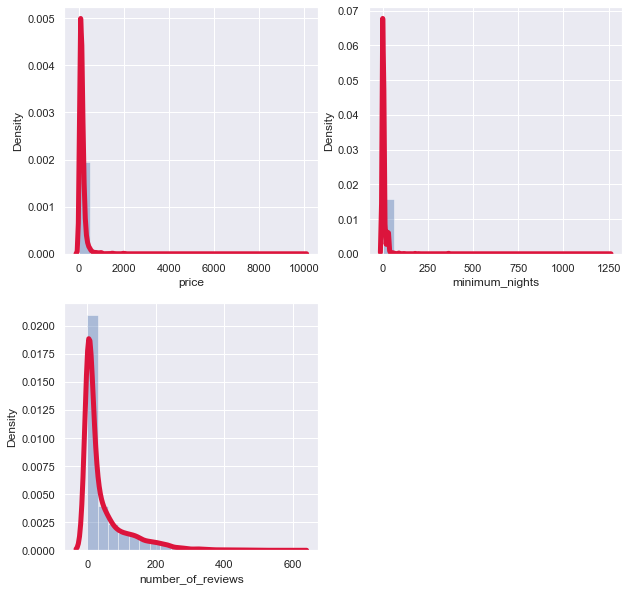

In [9]:
plt.figure(figsize=(10,10))  
sns.set() 
for i,var in enumerate(a):
    plt.subplot(2,2,i+1) 
    sns.distplot(df[var], bins=20, kde_kws={'linewidth':5,"color":'#DC143C'}) 

## Use mean median and mode when data is random missing
- When plot is symmetric - mean(pref) or median
- When plot is asymmetric - median

In [10]:
df1=df.fillna(df.mean())
df2=df.fillna(df.median())
df1.isnull().sum().sum() 

0

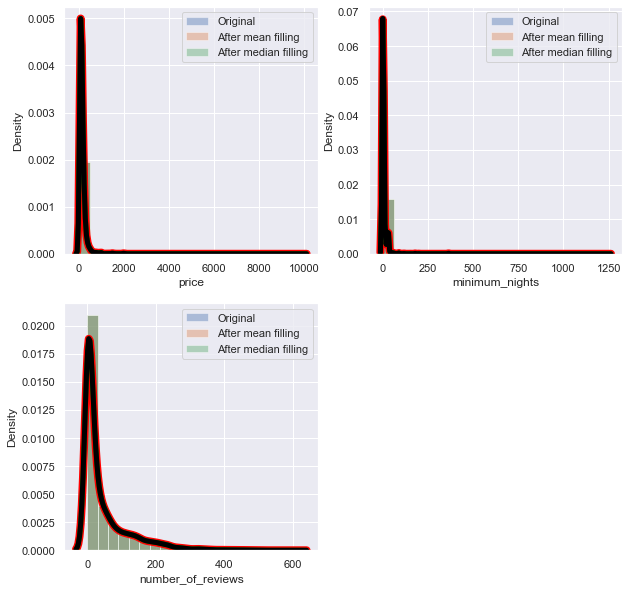

In [11]:
plt.figure(figsize=(10,10))  
sns.set() 
for i,var in enumerate(a):
    plt.subplot(2,2,i+1) 
    sns.distplot(df[var], bins=20, kde_kws={'linewidth':8,"color":'red'},label="Original")
    sns.distplot(df1[var], bins=20, kde_kws={'linewidth':5,"color":'green'},label="After mean filling")
    sns.distplot(df2[var], bins=20, kde_kws={'linewidth':5,"color":'black'},label="After median filling")
    plt.legend() 

In [99]:
df2=df.fillna(df.median())
df2.isnull().sum().sum()

C:\Users\MOONCO~1\AppData\Local\Temp/ipykernel_10908/1667706047.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2=df.fillna(df.median())


0

C:\Users\Moon Computer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Moon Computer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Moon Computer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

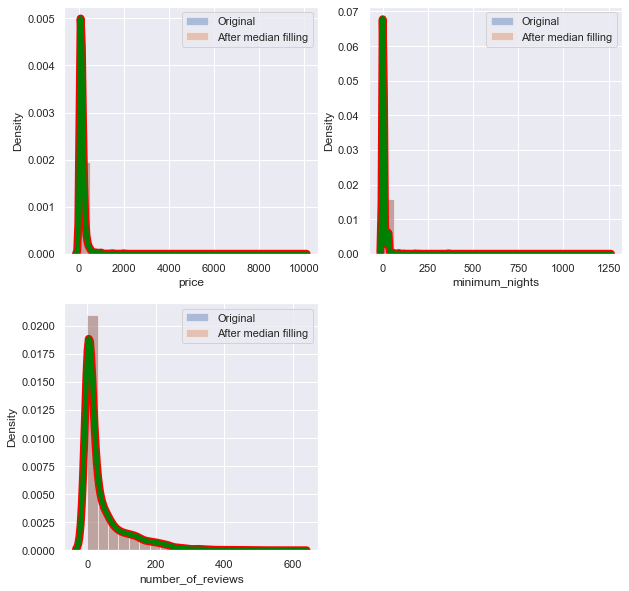

In [100]:
plt.figure(figsize=(10,10))  
sns.set() 
for i,var in enumerate(a):
    plt.subplot(2,2,i+1) 
    sns.distplot(df[var], bins=20, kde_kws={'linewidth':8,"color":'red'},label="Original")
    sns.distplot(df2[var], bins=20, kde_kws={'linewidth':5,"color":'green'},label="After median filling")
    plt.legend() 

In [129]:
df1

,host_name,host Gender,neighbourhood,room_type,price,minimum_nights,number_of_reviews
host_id,,,,,,,
2787.0,John,M,Kensington,Private room,149.0,1.0,9.0
2845.0,Jennifer,F,Midtown,Entire home/apt,225.0,1.0,45.0
4632.0,Elisabeth,F,Harlem,Private room,150.0,3.0,0.0
4869.0,LisaRoxanne,F,Clinton Hill,Entire home/apt,89.0,1.0,270.0
7192.0,Laura,F,East Harlem,Entire home/apt,80.0,10.0,9.0
...,...,...,...,...,...,...,...
35997506.0,Michael,F,Williamsburg,Private room,85.0,1.0,0.0
31919780.0,Neil,F,Bedford-Stuyvesant,Entire home/apt,99.0,3.0,98.0
40439772.0,Ezra,F,Washington Heights,Private room,45.0,3.0,29.0
